<a href="https://colab.research.google.com/github/jorgelum/EQ/blob/main/Evaporadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## U.C.: Operações Unitárias II

Coord.: Prof. Dr. Rafael M. Matricarde Falleiro

Autor: Jorge Luiz Mendes

### Enunciado


Um evaporador de triplo efeito (alimentação direta) concentra 22500 kg/h de
uma solução aquosa a 21,8 °C com 5 % (em massa) de um açúcar até atingir 25 %
de sólidos, usando vapor saturado a 200 kPa como fluido de aquecimento.
O calor específico (em $ \, \text{kJ.kg}^{-1}.\text{°C}^{-1}$)
de cada solução aquosa é aproximadamente dado por cp = 4,19 − 2,35.x, onde x é a fração mássica do soluto. A pressão no interior do último efeito é 14,3kPa e os coeficientes globais detransferência de calor de cada efeito (em $ \, \text{W.m}^{-2}. \text{°C}^{–1}$) são $U_{1}= 2319 \, , U_{2} = 2194 \, e \, U_{3} = 1296 $.


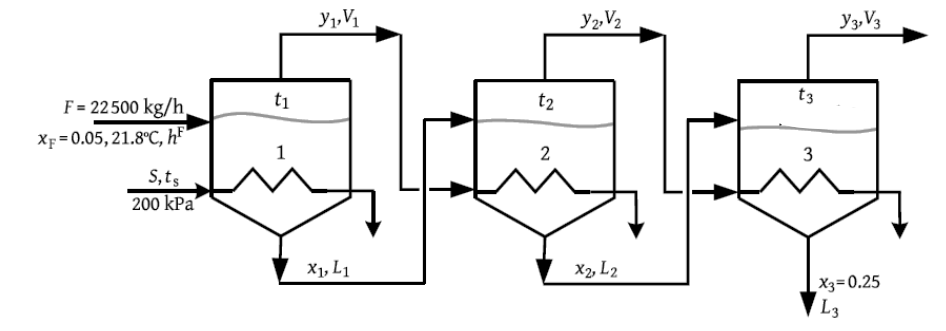

Desprezando a elevação ebulioscópica em cada solução, calcule:

a) A vazão de solução concentrada que sai do 3º efeito.

b) A área de cada efeito, admitindo que são iguais em cada efeito.

c) A taxa de vapor de aquecimento.

d) As temperaturas de ebulição das soluções dentro de cada efeito.

### Equacionamento

***Balanço de Massa Global***

$ F = L_3  + V_1 +  V_2 +  V_3 $

$ x_f F = x_3 L_3 $

***Balanço de Massa para cada efeito***

1° Efeito

$ F = V_1  + L_1  $

$ x_f F = x_1 L_1 $

2° Efeito

$ L_1 = V_2  + L_2  $

$ x_1 L_1 = x_2 L_2 $

3° Efeito

$ L_2 = V_3  + L_3  $

$ x_2 L_2 = x_3 L_3 $

***Balanço de Energia***

1° Evaporador
\begin{equation}
   \ Fh{^F} + SΔ_{vap} h_{S} =  L_{1}h_{1}^{L} + V_{1}h_{1}^{V}
\end{equation}
2° Evaporador
\begin{equation}
   \ L_{1}h_{1}^{L} + V_{1}Δ_{vap} h_{1} =  L_{2}h_{2}^{L} +  V_{2}h_{2}^{V}
\end{equation}
3° Evaporador
\begin{equation}
   \ L_{2}h_{2}^{L} + V_{2}Δ_{vap} h_{2} =  L_{3}h_{3}^{L} + V_{3}h_{3}^{V}
\end{equation}

***Equações Complementares***

Entalpia do líquido concentrado:
\begin{equation}
    h_{i}^{L} = Cp_{i} T_{i}
\end{equation}


\begin{equation}
    Cp_{i} = 4,19 - 2,35x_{i}
\end{equation} \\

Estimativa das temperaturas: \\
\begin{equation}
    \Delta T = \Delta T_{1} + \Delta T_{2} + \Delta T_{3}
\end{equation} \\

\begin{equation}
    \Delta T = (T_{S} - T_{1}) + (T_{1} - T_{2})+ (T_{2} - T_{3}) =  T_{S} - T_{3}
\end{equation} \\

\begin{equation}
    \Delta T_i = \frac{ \frac{\Delta T}{U_{i}} }{\frac{1}{U_{1}} + \frac{1}{U_{2}} + \frac{1}{U_{3}}}
\end{equation}




### Bibliotecas

In [1]:
import numpy as np #algebra linear
import scipy.optimize as opt #otimização
import matplotlib.pyplot as plt #Gráficos

### Resolução

Achando a primeira estimativa das temperaturas.

In [2]:
U = [2319,2194,1296] #Coeficiente

ts = 120.2 #temperatura de saturação a 200 KPa
t3 = 52.9 #temperatura de saturação a 14,3 KPa

deltaTG = ts - t3 #Diferença entre a temperatura do vapor vivo e do último evaporador

n = len(U)
deltaT = np.zeros(n)
t = np.zeros(n + 1)
t[0] = ts
for i in range(n):
  deltaT[i] = deltaTG*(1/U[i])/(1/U[0] + 1/U[1] +1/U[2])
  t[i+1] = t[i] - deltaT[i]
  print(f'Temperatura no evaporador {i+1}: {round(t[i+1],2)}ºC')

Temperatura no evaporador 1: 102.7ºC
Temperatura no evaporador 2: 84.21ºC
Temperatura no evaporador 3: 52.9ºC


Otimizando o balanço de massa.

In [3]:
#função para calcular cp
Cp = lambda x: 4.19 - 2.35*x

In [4]:
#Função objetivo
def FO(V):

  #dados iniciais
  F = 22500 # Alimentação
  xf = 0.05 # Fração de alimentação
  x3 = 0.25 # Fração resultante no 3ºEfeito

  #dados tabelados
  ts = 120.2 #temperatura de saturação a 200 KPa
  t3 = 52.9 #temperatura de saturação a 14,3 KPa

  LambdaS = 2201.5 #deltaH evap na saturação a 200 KPa
  H3 = 2596.6 # KJ/Kg

  #Com base na primeira estimativa das temperaturas
  t1 = 102.7
  t2 = 84.21
  H2 = 2649.9 # KJ/Kg
  H1 = 2679.1 # KJ/Kg
  H2evap =  2297.1
  H1evap =  2248.8

  #Balanço de massa global
  L3 = xf*F/x3 #Componentes


  #Balanço de massa do 3° efeito
  L2 = L3 + V[2]
  x2 = x3*L3/L2

  #Balanço de massa do 2° efeito
  L1 = L2 + V[1]
  x1 = x2*L2/L1

  #Balanço de Energia
  # 3°Efeito
  L_2 = (L3*Cp(x3)*(t3) + V[2]*H3 - V[1]*H2evap)/(Cp(x2)*t2)

  # 2°Efeito
  L_1 = (L_2*Cp(x2)*(t2) + V[1]*H2 - V[0]*H1evap)/(Cp(x1)*t1)


  R1 = (L_1 - L1)**2
  R2 = (L_2 - L2)**2

  return R1 + R2

In [5]:
v0 = [6000,6000,6000] #estimativa inicial

restricao = opt.LinearConstraint([1, 1, 1], 18000, 18000)
bounds = ((0,22500),(0,22500),(0,22500))

Resultado = opt.minimize(FO,v0,bounds=bounds,constraints=[restricao],method ="SLSQP").x
for i in range(len(Resultado)):
  print(f'V{i+1} = {round(Resultado[i],2)} kg/h')

V1 = 5589.12 kg/h
V2 = 6020.77 kg/h
V3 = 6390.11 kg/h


Calculando as áreas do evaporadores com os valores de V otimizados.

In [6]:
def Evaporador1(V):

  #dados iniciais
  F = 22500 # Alimentação
  xf = 0.05 # Fração de alimentação
  x3 = 0.25 # Fração resultante no 3ºEfeito
  U = [2319,2194,1296] #Coeficiente

  #dados tabelados
  tf = 21.8 #temperatura na alimentação
  ts = 120.2 #temperatura de saturação a 200 KPa
  t3 = 52.9 #temperatura de saturação a 14,3 KPa

  LambdaS = 2201.5 #deltaH evap na saturação a 200 KPa
  H3 = 2596.6 # KJ/Kg

  #Com base na primeira estimativa das temperaturas
  t1 = 102.7
  t2 = 84.21
  H2 = 2649.9 # KJ/Kg
  H1 = 2679.1 # KJ/Kg
  H2evap =  2297.1
  H1evap =  2248.8

  #Balanço de massa global
  L3 = xf*F/x3 #Componentes


  #Balanço de massa do 3° efeito
  L2 = L3 + V[2]
  x2 = x3*L3/L2

  #Balanço de massa do 2° efeito
  L1 = L2 + V[1]
  x1 = x2*L2/L1

  #Balanço de Energia
  # 3°Efeito
  L2 = (L3*Cp(x3)*(t3) + V[2]*H3 - V[1]*H2evap)/(Cp(x2)*t2)

  # 2°Efeito
  L1 = (L2*Cp(x2)*(t2) + V[1]*H2 - V[0]*H1evap)/(Cp(x1)*t1)

  # 1°Efeito
  S = (L1*Cp(x1)*(t1) + V[0]*H1 - F*Cp(xf)*tf)/(LambdaS)

  # Cálculo das Áreas
  n = len(V)
  q = np.zeros(n)
  q[0] = S*LambdaS
  q[1] = V[0]*H1evap
  q[2] = V[1]*H2evap
  A = np.zeros(n)
  for i in range(n):
    A[i] = q[i]/(U[i]*deltaT[i]*3.6)


  return A

In [7]:
A = Evaporador1(Resultado)
Am = sum(A)/3
print(f'Área média: {round(Am,2)}m\u00b2')
for n in range(len(A)):
  print(f'Área do Evaporador {n+1} é {round(A[n],2)} m\u00b2 e difere {round(abs((A[n] - Am)/Am)*100,2)} % da média')

Área média: 105.84m²
Área do Evaporador 1 é 136.79 m² e difere 29.25 % da média
Área do Evaporador 2 é 86.04 m² e difere 18.7 % da média
Área do Evaporador 3 é 94.68 m² e difere 10.54 % da média


Para completar a otimização devemos aproximar as áreas dos evaporadores da média entre eles.

Corrigindo as temperatura

In [8]:
n1 = len(U)
deltaTCor = np.zeros(n1)
for j in range(n1):
  deltaTCor[j] = deltaT[j]*A[j]/Am

ts = 120.2 #temperatura de saturação a 200 KPa
t3 = 52.9 #temperatura de saturação a 14,3 KPa

deltaTG = ts - t3 #Diferença entre a temperatura do vapor vivo e do último evaporador

#Redistribuindo a temperatura de forma aleatória
deltaTCor[0] = deltaTCor[0] + deltaTG - sum(deltaTCor)
tCor = np.zeros(n1 + 1)
tCor[0] = ts
for k in range(n1):
  tCor[k+1] = tCor[k] - deltaTCor[k]
  print(f'Temperatura corrigida no evaporador {k+1}: {round(tCor[k+1],2)}ºC')

Temperatura corrigida no evaporador 1: 95.94ºC
Temperatura corrigida no evaporador 2: 80.91ºC
Temperatura corrigida no evaporador 3: 52.9ºC


In [9]:
def Evaporador2(V):

  #dados iniciais
  F = 22500 # Alimentação
  xf = 0.05 # Fração de alimentação
  x3 = 0.25 # Fração resultante no 3ºEfeito
  U = [2319,2194,1296] #Coeficiente

  #dados tabelados
  tf = 21.8 #temperatura na alimentação
  ts = 120.2 #temperatura de saturação a 200 KPa
  t3 = 52.9 #temperatura de saturação a 14,3 KPa

  LambdaS = 2201.5 #deltaH evap na saturação a 200 KPa
  H3 = 2596.6 # KJ/Kg

  #Com base na correção das temperaturas
  t1 = 95.94
  t2 = 80.91

  H2 = 2644.4 # KJ/Kg
  H1 = 2669.1 # KJ/Kg
  H2evap =  2305.6 # KJ/Kg
  H1evap =  2267.3 # KJ/Kg

  #Balanço de massa global
  L3 = xf*F/x3 #Componentes


  #Balanço de massa do 3° efeito
  L2 = L3 + V[2]
  x2 = x3*L3/L2

  #Balanço de massa do 2° efeito
  L1 = L2 + V[1]
  x1 = x2*L2/L1

  #Balanço de Energia
  # 3°Efeito
  L2 = (L3*Cp(x3)*(t3) + V[2]*H3 - V[1]*H2evap)/(Cp(x2)*t2)

  # 2°Efeito
  L1 = (L2*Cp(x2)*(t2) + V[1]*H2 - V[0]*H1evap)/(Cp(x1)*t1)

  # 1°Efeito
  S = (L1*Cp(x1)*(t1) + V[0]*H1 - F*Cp(xf)*tf)/(LambdaS)

  # Cálculo das Áreas
  n = len(V)
  q = np.zeros(n)
  q[0] = S*LambdaS
  q[1] = V[0]*H1evap
  q[2] = V[1]*H2evap
  A = np.zeros(n)
  for i in range(n):
    A[i] = q[i]/(U[i]*deltaTCor[i]*3.6)


  return A

In [10]:
A = Evaporador2(Resultado)
Am = sum(A)/3
print(f'Área média: {round(Am,2)}m\u00b2')
for n in range(len(A)):
  print(f'Área do Evaporador {n+1} é {round(A[n],2)} m\u00b2 e difere {round(abs((A[n] - Am)/Am)*100,2)} % da média')

Área média: 103.47m²
Área do Evaporador 1 é 97.47 m² e difere 5.8 % da média
Área do Evaporador 2 é 106.71 m² e difere 3.13 % da média
Área do Evaporador 3 é 106.23 m² e difere 2.67 % da média


Resultados

In [11]:
def Evaporador3(V):

  #dados iniciais
  F = 22500 # Alimentação
  xf = 0.05 # Fração de alimentação
  x3 = 0.25 # Fração resultante no 3ºEfeito
  U = [2319,2194,1296] #Coeficiente

  #dados tabelados
  tf = 21.8 #temperatura na alimentação
  ts = 120.2 #temperatura de saturação a 200 KPa
  t3 = 52.9 #temperatura de saturação a 14,3 KPa

  LambdaS = 2201.5 #deltaH evap na saturação a 200 KPa
  H3 = 2596.6 # KJ/Kg

  #Com base na correção das temperaturas
  t1 = 95.94
  t2 = 80.91

  H2 = 2644.4 # KJ/Kg
  H1 = 2669.1 # KJ/Kg
  H2evap =  2305.6 # KJ/Kg
  H1evap =  2267.3 # KJ/Kg

  #Balanço de massa global
  L3 = xf*F/x3 #Componentes


  #Balanço de massa do 3° efeito
  L2 = L3 + V[2]
  x2 = x3*L3/L2

  #Balanço de massa do 2° efeito
  L1 = L2 + V[1]
  x1 = x2*L2/L1

  #Balanço de Energia
  # 3°Efeito
  L2 = (L3*Cp(x3)*(t3) + V[2]*H3 - V[1]*H2evap)/(Cp(x2)*t2)

  # 2°Efeito
  L1 = (L2*Cp(x2)*(t2) + V[1]*H2 - V[0]*H1evap)/(Cp(x1)*t1)

  # 1°Efeito
  S = (L1*Cp(x1)*(t1) + V[0]*H1 - F*Cp(xf)*tf)/(LambdaS)

  # Cálculo das Áreas
  n = len(V)

  q = np.zeros(n+1)
  q[0] = S*LambdaS/3600
  q[1] = V[0]*H1evap/3600
  q[2] = V[1]*H2evap/3600
  q[3] = V[2]*H3/3600

  x = np.zeros(n+1)
  x[0] = xf
  x[1] = x1
  x[2] = x2
  x[3] = x3

  L = np.zeros(n)
  L[0] = L1
  L[1] = L2
  L[2] = L3


  return x,L,q

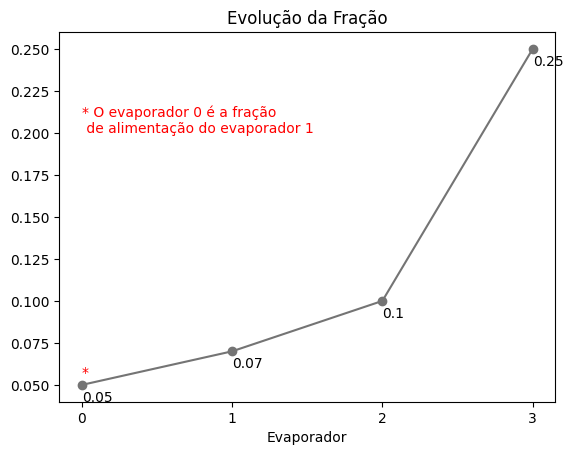

In [12]:
x = [0,1,2,3]
y = np.zeros(len(x))
texto = "* O evaporador 0 é a fração \n de alimentação do evaporador 1"
for w in range(len(x)):
  y[w] = round(Evaporador3(Resultado)[0][w],2)

fig, ax = plt.subplots()
ax.scatter(y = y,x =x,color ="#747474")
ax.plot(x,y,color ="#747474")
plt.title("Evolução da Fração")
plt.xlabel("Evaporador")
plt.xticks([0,1,2,3])

for i, txt in enumerate(y):
    ax.annotate(txt, (x[i], y[i]- 0.01))

ax.text(0, 0.055, s= "*",color = "red")
ax.text(0, 0.2, s= texto,color = "red")
plt.show()

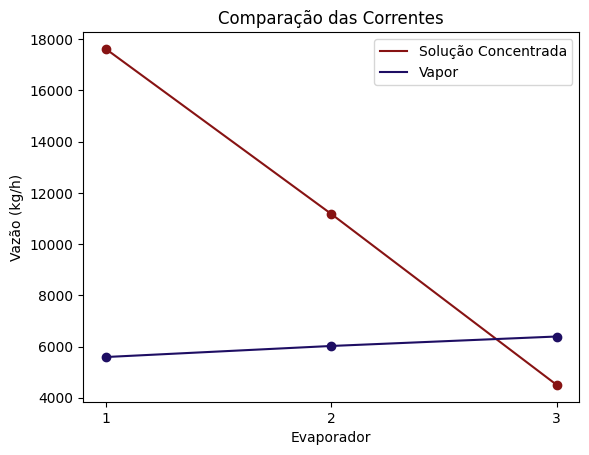

In [13]:
fig, ax = plt.subplots()
ax.scatter(y = Evaporador3(Resultado)[1], x =[1,2,3],color ="#871313")
ax.plot([1,2,3],Evaporador3(Resultado)[1],label = "Solução Concentrada",color ="#871313")
ax.scatter(y =Resultado,x =[1,2,3],color = "#1e0e63")
ax.plot([1,2,3],Resultado,label = "Vapor",color = "#1e0e63")
ax.legend()
plt.title("Comparação das Correntes")
plt.xlabel("Evaporador")
plt.ylabel("Vazão (kg/h)")
plt.xticks([1,2,3])
plt.show()

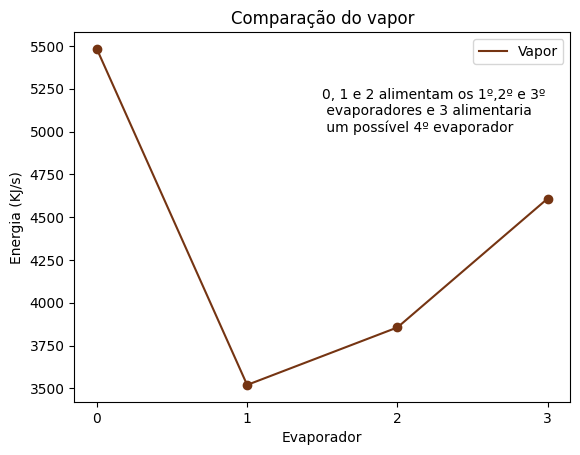

In [14]:
texto = "0, 1 e 2 alimentam os 1º,2º e 3º \n evaporadores e 3 alimentaria \n um possível 4º evaporador"
fig, ax = plt.subplots()
ax.scatter(y =Evaporador3(Resultado)[2],x =[0,1,2,3],color ="#753412")
ax.plot([0,1,2,3],Evaporador3(Resultado)[2],label = "Vapor",color ="#753412")
ax.text(1.5,5000, s = texto )
ax.legend()
plt.title("Comparação do vapor")
plt.xlabel("Evaporador")
plt.ylabel("Energia (KJ/s)")
plt.xticks([0,1,2,3])

plt.show()

### Conclusão

Cálculo de evaporadores é uma tarefa exaustiva que piora com o aumento do número de efeitos. Seria possível otimizar em uma única função se os dados de entalpia  vapor saturado (nesse caso foi desconsiderado elevação ebulioscópica) pudessem ser calculados por uma função, entretanto os dados são tabelados é necessário inserir manualmente.
O método SLSQP é um algoritmo de otimização que é adequado para problemas de  com restrições. Ele usa uma abordagem de programação de mínimos quadrados sequencial.
